In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
plt.rcParams['font.sans-serif'] = [u'simHei']  # 指定中文字体为黑体，防止乱码
plt.rcParams['axes.unicode_minus'] = False     # 使用ASCII字符，保证显示正确

In [3]:
# 修正文件路径和编码的分开
df = pd.read_csv(r'C:\Users\Administrator\Desktop\AI技术基础作业\weather.csv', encoding='gbk')
df.head()  

,Temperature_c,Humidity,Wind_Speed_kmh,Pressure_millibars,Rain,Description
0,-0.555556,0.92,11.2700,1021.60,0,Cold
1,21.111111,0.73,20.9300,1017.00,1,Warm
2,16.600000,0.97,5.9731,1013.99,1,Normal
3,1.600000,0.82,3.2200,1031.59,1,Cold
4,2.194444,0.60,10.8836,1020.88,1,Cold


In [4]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# 1. 整理数据
X = df.drop('Description', axis=1)  # 特征
y = df['Description']  # 目标

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. 尝试不同的k值
k_values = range(1, 21)  # k的范围
best_k = 0
best_score = 0

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X_train, y_train, cv=5)  # 5折交叉验证
    mean_score = scores.mean()
    if mean_score > best_score:
        best_score = mean_score
        best_k = k

# 3. 用最佳k重新训练模型
best_model = KNeighborsClassifier(n_neighbors=best_k)
best_model.fit(X_train, y_train)

# 测试分类准确率
y_pred = best_model.predict(X_test)
print(f'最佳k值: {best_k}')
print(classification_report(y_test, y_pred))

最佳k值: 11
              precision    recall  f1-score   support

        Cold       0.97      0.98      0.97       480
      Normal       0.97      0.98      0.98      1042
        Warm       0.98      0.96      0.97       478

    accuracy                           0.97      2000
   macro avg       0.98      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



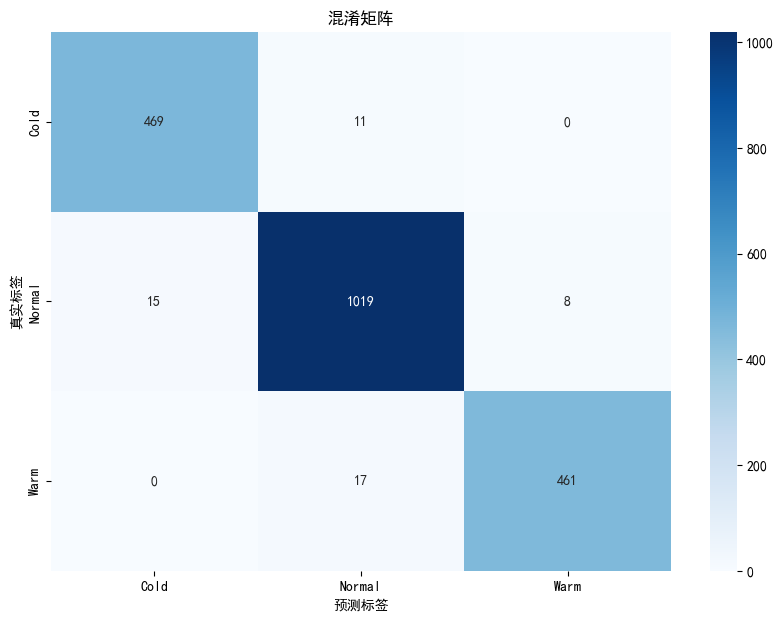

In [6]:
from sklearn.metrics import confusion_matrix
# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)

# 绘制热力图
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title('混淆矩阵')
plt.xlabel('预测标签')
plt.ylabel('真实标签')
plt.show()